## Local Correlation Matrix

### 1. Generate random graph

In [19]:
import networkx as nx

n = 10
prob = .6

graph = nx.erdos_renyi_graph(n, prob)
adjacency = nx.to_numpy_matrix(graph).A

### 2. Estimate steady state

In [20]:
F = .5
B = .2
R = 3

# todo division by zero if degree be 0
steady = [F/(R/graph.degree(i) + B) for i in range(0,n)]
print('steady_state\n', steady)

steady_state
 [0.625, 0.7142857142857143, 0.625, 0.29411764705882354, 0.625, 0.625, 0.7142857142857143, 0.4166666666666667, 0.625, 0.8695652173913044]


### 3. Calculate R

In [21]:
import numpy as np

def q_bar_prime_i(i, j):
    return -F/(R*steady[i]*steady[i]*steady[j])
    
def q_bar_prime_j(i, j):
    return -(F-B*steady[i])/(R*steady[j]*steady[j]*steady[i])


def r_i_j(i,j):
    if adjacency[i,j] == 0:
        return 0
    
    sum = 0
    for k in range(0,n):
        if adjacency[i,k] == 1:
            sum = sum + q_bar_prime_i(i,k)
    
    return steady[j]*q_bar_prime_j(i,j)/(steady[i]*sum)


r = np.array([[r_i_j(i,j) for j in range(0,n)] for i in range(0,n)])

print('adjacency\n', adjacency)
print('r\n', r)

adjacency
 [[0. 1. 0. 0. 1. 1. 1. 0. 0. 1.]
 [1. 0. 1. 1. 0. 0. 1. 1. 0. 1.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 1. 1. 1. 0.]
 [1. 0. 1. 0. 1. 0. 0. 0. 1. 1.]
 [1. 1. 1. 0. 1. 0. 0. 0. 1. 1.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 1. 1. 0. 0. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 0.]]
r
 [[0.         0.14685315 0.         0.         0.16783217 0.16783217
  0.14685315 0.         0.         0.12062937]
 [0.09894867 0.         0.09894867 0.21026592 0.         0.
  0.08658009 0.14842301 0.         0.07111936]
 [0.         0.14685315 0.         0.         0.         0.16783217
  0.14685315 0.         0.16783217 0.12062937]
 [0.         0.48442907 0.         0.         0.         0.
  0.         0.         0.         0.39792388]
 [0.13953488 0.         0.         0.         0.         0.13953488
  0.12209302 0.20930233 0.13953488 0.        ]
 [0.1589404  0.         0.1589404  0.         0.1589404  0.
  0.         0.         0.1589404  0

## Correlation Matrix

### 1. Solve linear equations system

In [22]:
def _g(i, j):
    if i == j:
        return syms[i][j] - 1
    
    eq = syms[i][j]
    for q in range(0,n):
        eq = eq - r[i,q]*syms[q][j]
    return eq

In [23]:
from sympy import symbols, solve_poly_system

syms = [[symbols('{}_{}'.format(i,j)) for i in range(0,n)] for j in range(n)]
eq_system = [_g(int(cnt/n),cnt%n) for cnt in range(0,n*n)]
                        
g = solve_poly_system(eq_system)
print('g\n', g)

# todo: convert g to matrix

g
 [(1.00000000000000, 0.216395695370805, 0.166679024740429, 0.179405472714103, 0.273046903967515, 0.277980141943675, 0.247508970663909, 0.191838727407989, 0.174527562713948, 0.187415515325765, 0.282234980341391, 1.00000000000000, 0.277281513982623, 0.592119856536026, 0.206482829057061, 0.180792197020187, 0.256981227720395, 0.409959620859521, 0.176968425336068, 0.270631639468797, 0.165849465338413, 0.211539668629733, 1.00000000000000, 0.178873908689981, 0.166698346658792, 0.280517643607229, 0.249005039776089, 0.157362038306849, 0.294381908178018, 0.191991356549929, 0.110290111262174, 0.279092580425623, 0.110513354077896, 1.00000000000000, 0.0841314926408265, 0.0865477656200074, 0.100716450106726, 0.155010630299457, 0.0854616477511718, 0.214446033104434, 0.303707751222621, 0.176092289257501, 0.186344589232623, 0.152221615191407, 1.00000000000000, 0.303835714903947, 0.263778297552028, 0.409622583916298, 0.300711159809594, 0.168166315602317, 0.285339665628125, 0.142287200919465, 0.2893846

### 2. Plot distribution of G

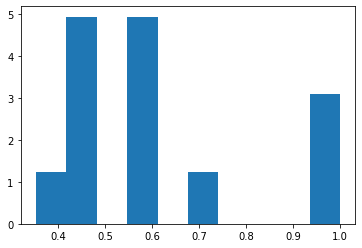

In [9]:
import matplotlib.pyplot as plt

count, bins, patches = plt.hist([float(f) for f in list(g[0])], density=True)
plt.show()